# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

### Variable Information:

    Given is the variable name, variable type, the measurement unit and a brief description. 
    The concrete compressive strength is the regression problem. The order of this listing 
    corresponds to the order of numerals along the rows of the database. 

    Name -- Data Type -- Measurement -- Description

    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete compressive strength -- quantitative -- MPa -- Output Variable
    
    
    Data Set Characteristics: Multivariate
    Attribute Characteristics: Real
    Associated Tasks: Regression
    Number of Instances: 103
    Number of Attributes: 10
    Missing Values? N/A
    Area: Computer
    Date Donated: 2009-04-30

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"]=(10,6)
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # datayı split etmek için
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier #  aşahıda from ile başlayanların hepsi machine learning modellerdir
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures # for convert polynomialregression
from sklearn.linear_model import LinearRegression # for model fitting
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # evaluation metricleri
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler # scaling için kullanılan metricler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
dfreal = pd.read_csv("cement_slump.csv")
df= dfreal.copy()
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


In [6]:
df.shape

(103, 10)

In [7]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [8]:
df.isin(["?","-"]).sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

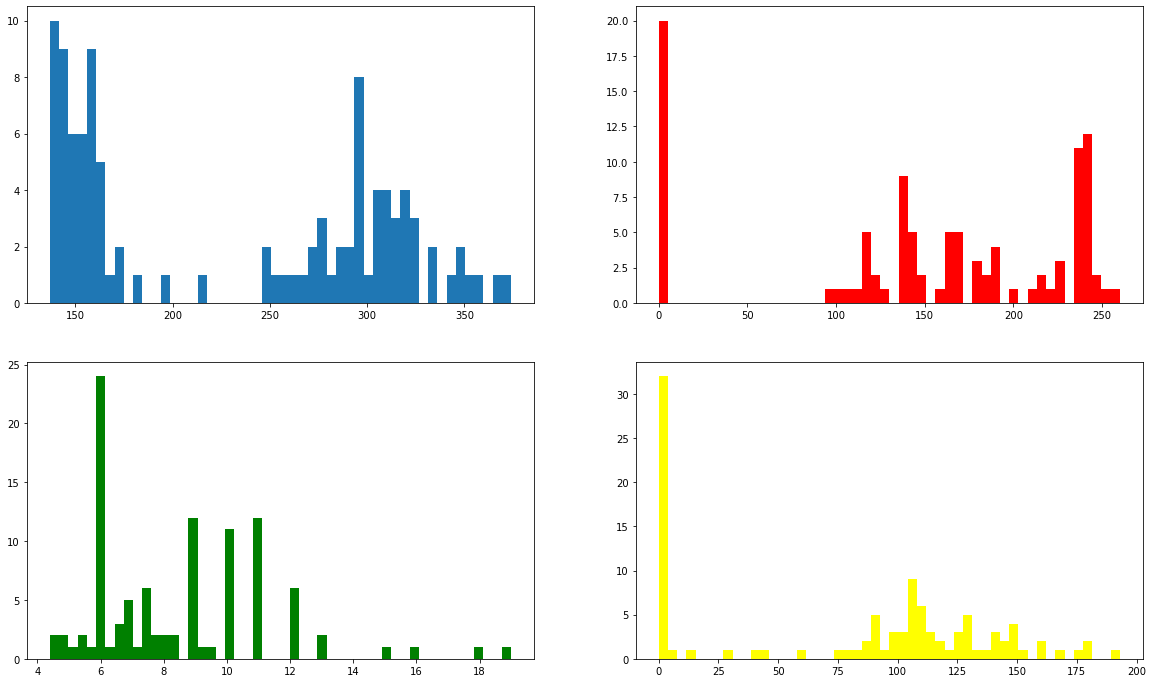

In [9]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.hist(df.Cement, bins=50)

plt.subplot(222)
plt.hist(df["Fly ash"],bins=50,color="red")

plt.subplot(223)
plt.hist(df["SP"],bins=50,color="green")

plt.subplot(224)
plt.hist(df["Slag"],bins=50,color="yellow")

plt.show()

In [10]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


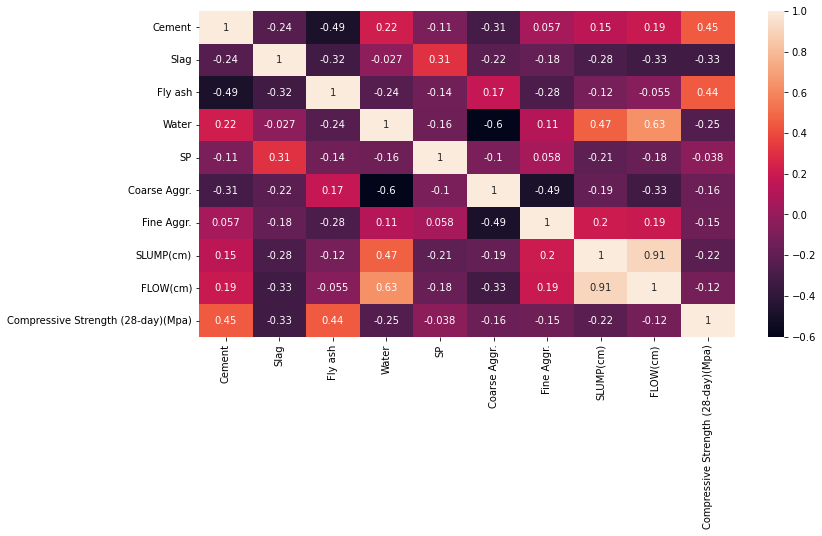

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True)
plt.show();

- flow ve slump columnları arasında güçlü korelasyon var, bu ML için overfitting'e sebep olabilir,
bu sutunlar için ridge-lasso düşünülebilir.
- target column en çok cement ve fly ash ile bağlantılı

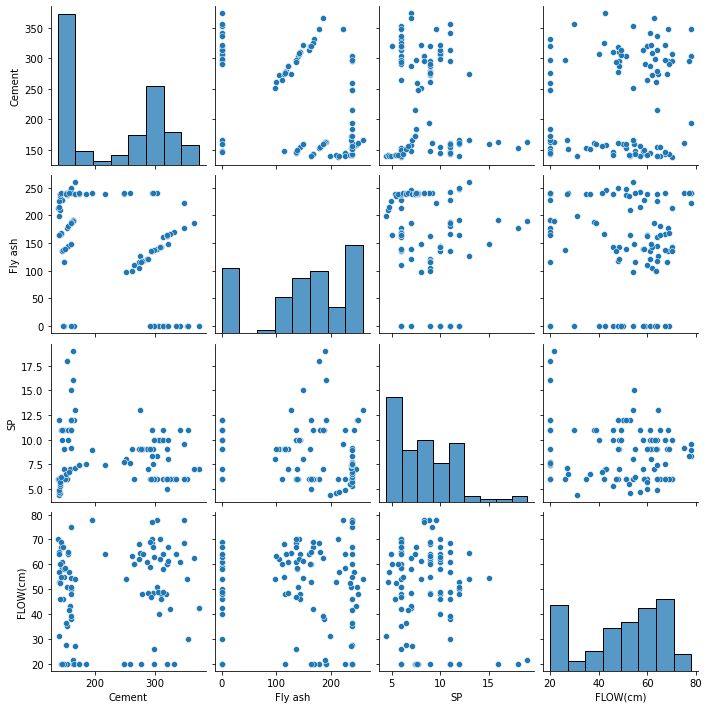

In [12]:
df_graff = df[["Cement","Fly ash","SP","FLOW(cm)"]]
sns.pairplot(df_graff)

In [13]:
df["Compressive Strength (28-day)(Mpa)"].value_counts(dropna=False)

34.990    2
41.140    2
41.270    2
35.520    2
44.080    2
         ..
58.530    1
45.690    1
32.040    1
36.460    1
48.700    1
Name: Compressive Strength (28-day)(Mpa), Length: 83, dtype: int64

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Density'>

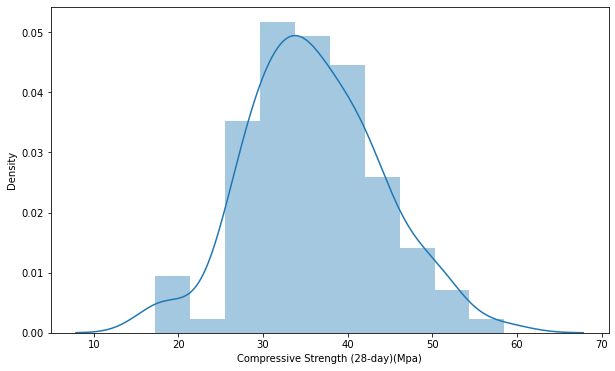

In [14]:
sns.distplot(df["Compressive Strength (28-day)(Mpa)"])

- Traget column normal distribution'a yakın , ileride scaling için lazım bir bilgi

# Data Preprocessing 

### Features and target variable

In [15]:
X = df.drop(columns="Compressive Strength (28-day)(Mpa)")
y= df["Compressive Strength (28-day)(Mpa)"]

In [16]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000


In [17]:
y

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

### Splitting data into training and testing

In [18]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


- datamızı test ve train olarak ayırdık

In [19]:
print("Train features shape : ", X_train.shape)
print("Train target shape : ", y_train.shape)
print("Test features shape : ", X_test.shape)
print("Test target shape : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape :  (72,)
Test features shape :  (31, 9)
Test target shape :  (31,)


- ayrılan datamızın shape'ına baktık

In [20]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
11,148.000,109.000,139.000,193.000,7.000,768.000,902.000,23.750,58.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000
55,159.000,193.000,0.000,208.000,12.000,821.000,818.000,23.000,50.000
28,298.000,107.000,137.000,201.000,6.000,878.000,655.000,16.000,26.000
64,265.000,86.000,111.000,195.000,6.000,833.000,790.000,27.000,60.000
...,...,...,...,...,...,...,...,...,...
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
92,303.800,0.200,239.800,236.400,8.300,780.100,715.300,25.000,78.000
51,342.000,136.000,0.000,225.000,11.000,770.000,747.000,21.000,61.000


- x_train datamızda label column olmadığından emin olmak için kontrol ettik

In [21]:
model = LinearRegression() # basit modelimizi oluşturduk

In [22]:
model.fit(X_train,y_train) # modelimize train datalarını fit ettik

LinearRegression()

In [23]:
y_pred_train = model.predict(X_train) # Feature'ları modele sokup değerlendirme için karşılaştıracağız
y_pred_test = model.predict(X_test)

In [24]:
my_dict = {"Actual": y_test, "Pred": y_pred_test, "Residual": y_test  - y_pred_test}
# değerlendirme için şimdilik böyle bakalım ama asıl değerlendirme için scaling yapmamız gerekiyor

In [25]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
30,45.820,44.943,0.877
67,40.340,41.169,-0.829
62,28.290,28.563,-0.273
47,43.010,39.211,3.799
42,33.510,35.282,-1.772
40,35.660,39.457,-3.797
90,35.520,37.252,-1.732
45,31.770,31.227,0.543
10,26.020,28.770,-2.750
0,34.990,34.480,0.510


In [26]:
mae_train = mean_absolute_error(y_train,y_pred_train) # modelimizin error metricleri ile değerlendirelim
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_score_train = r2_score(y_train,y_pred_train)
print(f"r2_score_train : {r2_score_train}")
print(f"mae_train: {mae_train}")
print(f"mse_train : {mse_train}")
print(f"rmse_train : {rmse_train}")

r2_score_train : 0.9001468622637668
mae_train: 1.9919336865776545
mse_train : 6.237116156459252
rmse_train : 2.497421901973964


In [27]:
mae_test = mean_absolute_error(y_test,y_pred_test)
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_score_test = r2_score(y_test,y_pred_test)
print(f"r2_score_test : {r2_score_test}")
print(f"mae_test : {mae_test}")
print(f"mse_test : {mse_test}")
print(f"rmse_test : {rmse_test}")

r2_score_test : 0.9212363726145724
mae_test : 1.7157819342821743
mse_test : 4.438896026004759
rmse_test : 2.106868772848646


In [28]:
df_table1 = pd.DataFrame({'train': [mae_train,mse_train,rmse_train,r2_score_train],
                   'test': [mae_test,mse_test,rmse_test,r2_score_test]}, 
                  index = ["mae","mse","rmse","r2_score"])
df_table1

,train,test
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107
r2_score,0.900,0.921


In [29]:
df_table1.corr()

,train,test
train,1.000,0.999
test,0.999,1.000


In [30]:
# bağıl hata olarak değerlendirme
a1 = mae_train /y_train.mean()*100
a2 =mse_train /y_train.mean()*100
a3 = rmse_train /y_train.mean()*100
a4 = r2_score_train /y_train.mean()*100

b1 = mae_test /y_test.mean()*100
b2 =mse_test /y_test.mean()*100
b3 = rmse_test /y_test.mean()*100
b4 = r2_score_test /y_test.mean()*100

df_table2 = pd.DataFrame({'train': [a1,a2,a3,a4],
                   'test': [b1,b2,b3,b4]}, 
                  index = ["mae","mse","rmse","r2_score"])
df_table2

,train,test
mae,5.572,4.673
mse,17.448,12.089
rmse,6.987,5.738
r2_score,2.518,2.509


In [31]:
df_table2.corr()

,train,test
train,1.000,0.999
test,0.999,1.000


In [32]:
# sonuç olarak modelimizde iyi duruyor ama ileri değerlendirme yapmamız lazım
# polınomiyal regression deneyelim

In [33]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees = []
    
    for i in range(1,d):
        polynomial_converter = PolynomialFeatures(degree = i,include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train,X_test,y_train,y_test=train_test_split(poly_features,y, test_size=0.3, random_state=101)
        
        model= LinearRegression(fit_intercept=True)
        model.fit(X_train,y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors": test_rmse_errors, "number of features": number_of_features, "degree":degrees}, index= range(1,d))

In [34]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features,degree
1,2.225,2.861,9,1
2,0.221,1.645,54,2
3,0.000,3.977,219,3
4,0.000,3.998,714,4
5,0.000,3.880,2001,5
6,0.000,3.563,5004,6
7,0.000,3.200,11439,7
8,0.000,2.825,24309,8
9,0.000,2.534,48619,9


- polınomial regression sonuçlarını ön görmek yukarıdaki kodu kullandık (poly_degree = 1) ile (poly_degree = 2) arasında kaldım
- poly_degree = 2 uygulayıp sonuçları görelim

In [35]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias=False)

In [36]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [37]:
poly_features = polynomial_converter.transform(X)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(poly_features,y, test_size=0.3,random_state=101)

In [39]:
model_poly = LinearRegression()

In [40]:
model_poly.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = model_poly.predict(X_test)

In [42]:
my_dict = {"Actual": y_test,"pred":y_pred, "residual":y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,18.260,19.476,-1.216
1,41.140,39.214,1.926
69,31.900,30.755,1.145
80,26.420,24.117,2.303
92,44.480,47.844,-3.364
61,39.930,39.365,0.565
85,30.970,30.912,0.058
53,38.590,38.638,-0.048
88,37.920,37.811,0.109
32,52.650,52.833,-0.183


In [43]:
def eval_metric(actual,pred):
    mae= mean_absolute_error(actual,pred)
    mse= mean_squared_error(actual,pred)
    rmse= np.sqrt(mean_squared_error(actual,pred))
    R2_score = r2_score(actual,pred)
    print("model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t:{mae}")
    print(f"MSE \t\t:{mse}")
    print(f"RMSE \t\t:{rmse}")

In [44]:
eval_metric(y_test,y_pred)

model testing performance:
--------------------------
R2_score 	: 0.9604730352872773
MAE 		:1.2192935628145525
MSE 		:2.706620318464362
RMSE 		:1.645180937910588


In [45]:
y_train_pred = model_poly.predict(X_train)

In [46]:
eval_metric(y_train,y_train_pred)

model testing performance:
--------------------------
R2_score 	: 0.9991497267251591
MAE 		:0.17046182786571673
MSE 		:0.04888843167112003
RMSE 		:0.2211072854320274


- datamız için poly_degree = 2 daha uygun duruyor

## Scaling

##  1. Model Building (Linear Regression)

In [47]:
scaler = StandardScaler()

### 1.1 Interpret the model

In [48]:
scaler.fit(X_train) 

StandardScaler()

In [49]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [50]:
pd.DataFrame(X_train_scaled).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,...,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [51]:
pd.DataFrame(X_test_scaled).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,...,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [52]:
model2 = LinearRegression()

In [53]:
model2.fit(X_train_scaled,y_train)

LinearRegression()

In [54]:
y_pred = model2.predict(X_test_scaled)
y_train_pred = model2.predict(X_train_scaled)

### 1.2 Model Evaluation

In [55]:
def train_val(y_train,y_train_pred, y_test, y_pred,name):
    scores = {name+"_train":{"R2" : r2_score(y_train,y_train_pred),
                "mae":mean_absolute_error(y_train,y_train_pred),
                "mse":mean_squared_error(y_train,y_train_pred),
                "rmse": np.sqrt(mean_squared_error(y_train,y_train_pred))},
            
              name+"_test":{"R2" : r2_score(y_test,y_pred),
                "mae":mean_absolute_error(y_test,y_pred),
                "mse":mean_squared_error(y_test,y_pred),
                "rmse": np.sqrt(mean_squared_error(y_test,y_pred))}}
    
    return pd.DataFrame(scores)

In [56]:
model2=train_val(y_train,y_train_pred,y_test,y_pred,"linear")
model2


,linear_train,linear_test
R2,0.999,0.960
mae,0.170,1.219
mse,0.049,2.707
rmse,0.221,1.645


### multicolineraty

In [57]:
# yukarıda heatmap da olduğunu görmştük
def color_red(val):
    if val > 0.90 and val < 0.99:
        color ="red"
    else:
        color="black"
    return f"color:{color}"

In [58]:
pd.DataFrame(X).corr().style.applymap(color_red)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [59]:
alpha_range = np.linspace(0.001,0.1,100)
alpha_range

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ])

In [60]:
ridge_cv_model = RidgeCV(alphas = alpha_range,cv=5,
                         scoring="r2")

In [61]:
ridge_cv_model.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
        cv=5, scoring='r2')

In [62]:
ridge_cv_model.alpha_

0.003

In [63]:
ridge_cv_model.best_score_

0.9736616622320649

In [64]:
ridge_model = Ridge(alpha=0.03, random_state=42)

In [65]:
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=0.03, random_state=42)

In [66]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [67]:
rs = train_val(y_train,y_train_pred,y_test,y_pred,"ridge")
rs

,ridge_train,ridge_test
R2,0.996,0.948
mae,0.376,1.425
mse,0.230,3.576
rmse,0.479,1.891


In [68]:
pd.concat([model2,rs],axis=1)
# r2 neden azalduğını anlayamadım ?

,linear_train,linear_test,ridge_train,ridge_test
R2,0.999,0.960,0.996,0.948
mae,0.170,1.219,0.376,1.425
mse,0.049,2.707,0.230,3.576
rmse,0.221,1.645,0.479,1.891


In [69]:
### cross validation ile en iyisi ile karşılaştıralım

In [70]:
model = Ridge(alpha=0.03 , random_state=42)
scores = cross_validate(model,X_train_scaled, y_train,
                       scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error",
                               "neg_root_mean_squared_error"], cv=5)

In [71]:
scores = pd.DataFrame(scores,index=range(1,6))
scores.iloc[:,2:].mean()

test_r2                             0.911
test_neg_mean_absolute_error       -1.399
test_neg_mean_squared_error        -3.959
test_neg_root_mean_squared_error   -1.914
dtype: float64

## 2.2 Lasso (Apply and evalute)

In [72]:
alpha_range = np.linspace(0.001,0.1,100)
alpha_range

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ])

In [73]:
lasso_cv_model = LassoCV(alphas = alpha_range, cv=5,
                         max_iter = 100000,random_state=42)

In [74]:
lasso_cv_model.fit(X_train_scaled,y_train)

LassoCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
        cv=5, max_iter=100000, random_state=42)

In [75]:
lasso_cv_model.alpha_

0.001

In [76]:
lasso_model = Lasso(alpha = 0.01, random_state=42)
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.01, random_state=42)

In [77]:
ls = train_val(y_train,y_train_pred,y_test,y_pred,"lasso")
ls

,lasso_train,lasso_test
R2,0.996,0.948
mae,0.376,1.425
mse,0.230,3.576
rmse,0.479,1.891


In [78]:
pd.concat([model2,rs,ls],axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.999,0.960,0.996,0.948,0.996,0.948
mae,0.170,1.219,0.376,1.425,0.376,1.425
mse,0.049,2.707,0.230,3.576,0.230,3.576
rmse,0.221,1.645,0.479,1.891,0.479,1.891


In [79]:
# modelimize cross validation'la bakalım

In [80]:
model = Ridge(alpha=0.01 , random_state=42)
scores = cross_validate(model,X_train_scaled, y_train,
                       scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error",
                               "neg_root_mean_squared_error"], cv=5)

In [81]:
scores = pd.DataFrame(scores,index=range(1,6))
scores.iloc[:,2:].mean()

test_r2                             0.954
test_neg_mean_absolute_error       -1.122
test_neg_mean_squared_error        -2.493
test_neg_root_mean_squared_error   -1.473
dtype: float64

## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [82]:
# önce best alpha ve l1_raito bulalım
elastic_cv_model = ElasticNetCV(alphas= alpha_range,l1_ratio=[0.05,0.1,0.25,0.5,0.75,0.90,0.95,1],
                               cv= 5 , max_iter=100000,random_state=42)

In [83]:
elastic_cv_model.fit(X_train_scaled,y_train)


ElasticNetCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
             cv=5, l1_ratio=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1],
             max_iter=100000, random_state=42)

In [84]:
elastic_cv_model.alpha_ 

0.001

In [85]:
elastic_cv_model.l1_ratio_ 

1.0

In [86]:
# modelimiz için alpha 0.001 , l1_raito 1.0 alalım
elastic_model = ElasticNet(alpha=0.001, l1_ratio=1,random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.001, l1_ratio=1, random_state=42)

In [87]:
en = train_val(y_train,y_train_pred,  y_test,y_pred,"elastic_net")
en

,elastic_net_train,elastic_net_test
R2,0.996,0.948
mae,0.376,1.425
mse,0.230,3.576
rmse,0.479,1.891


In [88]:
pd.concat([model2,rs,ls,en],axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_net_train,elastic_net_test
R2,0.999,0.960,0.996,0.948,0.996,0.948,0.996,0.948
mae,0.170,1.219,0.376,1.425,0.376,1.425,0.376,1.425
mse,0.049,2.707,0.230,3.576,0.230,3.576,0.230,3.576
rmse,0.221,1.645,0.479,1.891,0.479,1.891,0.479,1.891


In [89]:
# cross validation bakalım

In [90]:
model = ElasticNet(alpha=0.001,l1_ratio=1,random_state=42)
scores = cross_validate(model,X_train_scaled,y_train,
                       scoring=["r2","neg_mean_absolute_error",
                               "neg_mean_squared_error","neg_root_mean_squared_error"],
                       cv=5)

In [91]:
scores = pd.DataFrame(scores,index=range(1,6))
scores.iloc[:,2:].mean()

test_r2                             0.850
test_neg_mean_absolute_error       -1.728
test_neg_mean_squared_error        -6.329
test_neg_root_mean_squared_error   -2.429
dtype: float64

# THE END